In [2]:
ROOT_DIR = '/content/YOLOv8'

In [3]:
!mkdir {ROOT_DIR}
%cd {ROOT_DIR}

/content/YOLOv8


In [4]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 15292, done.
remote: Counting objects: 100% (1423/1423), done.
remote: Compressing objects: 100% (815/815), done.
remote: Total 15292 (delta 973), reused 893 (delta 608), pack-reused 13869
Receiving objects: 100% (15292/15292), 8.52 MiB | 19.56 MiB/s, done.
Resolving deltas: 100% (10450/10450), done.


In [5]:
%cd ultralytics/

/content/YOLOv8/ultralytics


In [6]:

!pip install -r requirements.txt
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 7.8 MB/s eta 0:00:00


In [7]:
%cd {ROOT_DIR}

/content/YOLOv8


In [8]:

!pip install Ipython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00


In [9]:
import matplotlib.pyplot as plt
from IPython.display import Image as imgshow
import os

In [10]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.7 source="/content/drive/MyDrive/Colab Notebooks/datasets/dogs_n_cars (1).jpg" save=True

100% 6.23M/6.23M [00:00<00:00, 171MB/s]
Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/Colab Notebooks/datasets/dogs_n_cars (1).jpg: 640x640 4 persons, 7 cars, 4 dogs, 1 cow, 8.0ms
Speed: 18.3ms preprocess, 8.0ms inference, 38.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [12]:
imgshow('/content/YOLOv8/runs/detect/predict/dogs_n_cars (1).jpg', width = 600)

Output hidden; open in https://colab.research.google.com to view.

In [13]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4" save=True

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

video 1/1 (1/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 94.8ms
video 1/1 (2/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 7.3ms
video 1/1 (3/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 7.6ms
video 1/1 (4/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 9 persons, 7.3ms
video 1/1 (5/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 1 backpack, 8.7ms
video 1/1 (6/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 1 backpack, 7.6ms
video 1/1 (7/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid.mp4: 384x640 8 persons, 1 backpack, 7.5ms
video 1/1 (8/272) /content/drive/MyDrive/Colab Notebooks/datasets/test

Python code

In [14]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
#import requests
#from io import BytesIO
import cv2
from google.colab.patches import cv2_imshow

In [15]:
model = YOLO("yolov8n.pt")

In [16]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/datasets/dogs_n_cars (1).jpg')
image = np.asarray(image)
results = model.predict(image)


0: 640x640 4 persons, 9 cars, 8 dogs, 1 cow, 8.9ms
Speed: 7.4ms preprocess, 8.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


In [17]:
# @title helper functions
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}
  #Define colors
  if colors == []:
    #colors = [(6, 112, 83), (253, 246, 160), (40, 132, 70), (205, 97, 162), (149, 196, 30), (106, 19, 161), (127, 175, 225), (115, 133, 176), (83, 156, 8), (182, 29, 77), (180, 11, 251), (31, 12, 123), (23, 6, 115), (167, 34, 31), (176, 216, 69), (110, 229, 222), (72, 183, 159), (90, 168, 209), (195, 4, 209), (135, 236, 21), (62, 209, 199), (87, 1, 70), (75, 40, 168), (121, 90, 126), (11, 86, 86), (40, 218, 53), (234, 76, 20), (129, 174, 192), (13, 18, 254), (45, 183, 149), (77, 234, 120), (182, 83, 207), (172, 138, 252), (201, 7, 159), (147, 240, 17), (134, 19, 233), (202, 61, 206), (177, 253, 26), (10, 139, 17), (130, 148, 106), (174, 197, 128), (106, 59, 168), (124, 180, 83), (78, 169, 4), (26, 79, 176), (185, 149, 150), (165, 253, 206), (220, 87, 0), (72, 22, 226), (64, 174, 4), (245, 131, 96), (35, 217, 142), (89, 86, 32), (80, 56, 196), (222, 136, 159), (145, 6, 219), (143, 132, 162), (175, 97, 221), (72, 3, 79), (196, 184, 237), (18, 210, 116), (8, 185, 81), (99, 181, 254), (9, 127, 123), (140, 94, 215), (39, 229, 121), (230, 51, 96), (84, 225, 33), (218, 202, 139), (129, 223, 182), (167, 46, 157), (15, 252, 5), (128, 103, 203), (197, 223, 199), (19, 238, 181), (64, 142, 167), (12, 203, 242), (69, 21, 41), (177, 184, 2), (35, 97, 56), (241, 22, 161)]
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]

  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    cv2.imshow(image) #if used in Python

In [18]:
plot_bboxes(image, results[0].boxes.boxes, score=False)

Output hidden; open in https://colab.research.google.com to view.

#Segmentation

In [20]:
# @title CLI
!yolo task=segment mode=predict model='yolov8n-seg.pt' conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/datasets/dogs_n_cars (1).jpg" save=True

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

image 1/1 /content/drive/MyDrive/Colab Notebooks/datasets/dogs_n_cars (1).jpg: 640x640 4 persons, 9 cars, 7 dogs, 1 cow, 9.9ms
Speed: 3.5ms preprocess, 9.9ms inference, 87.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


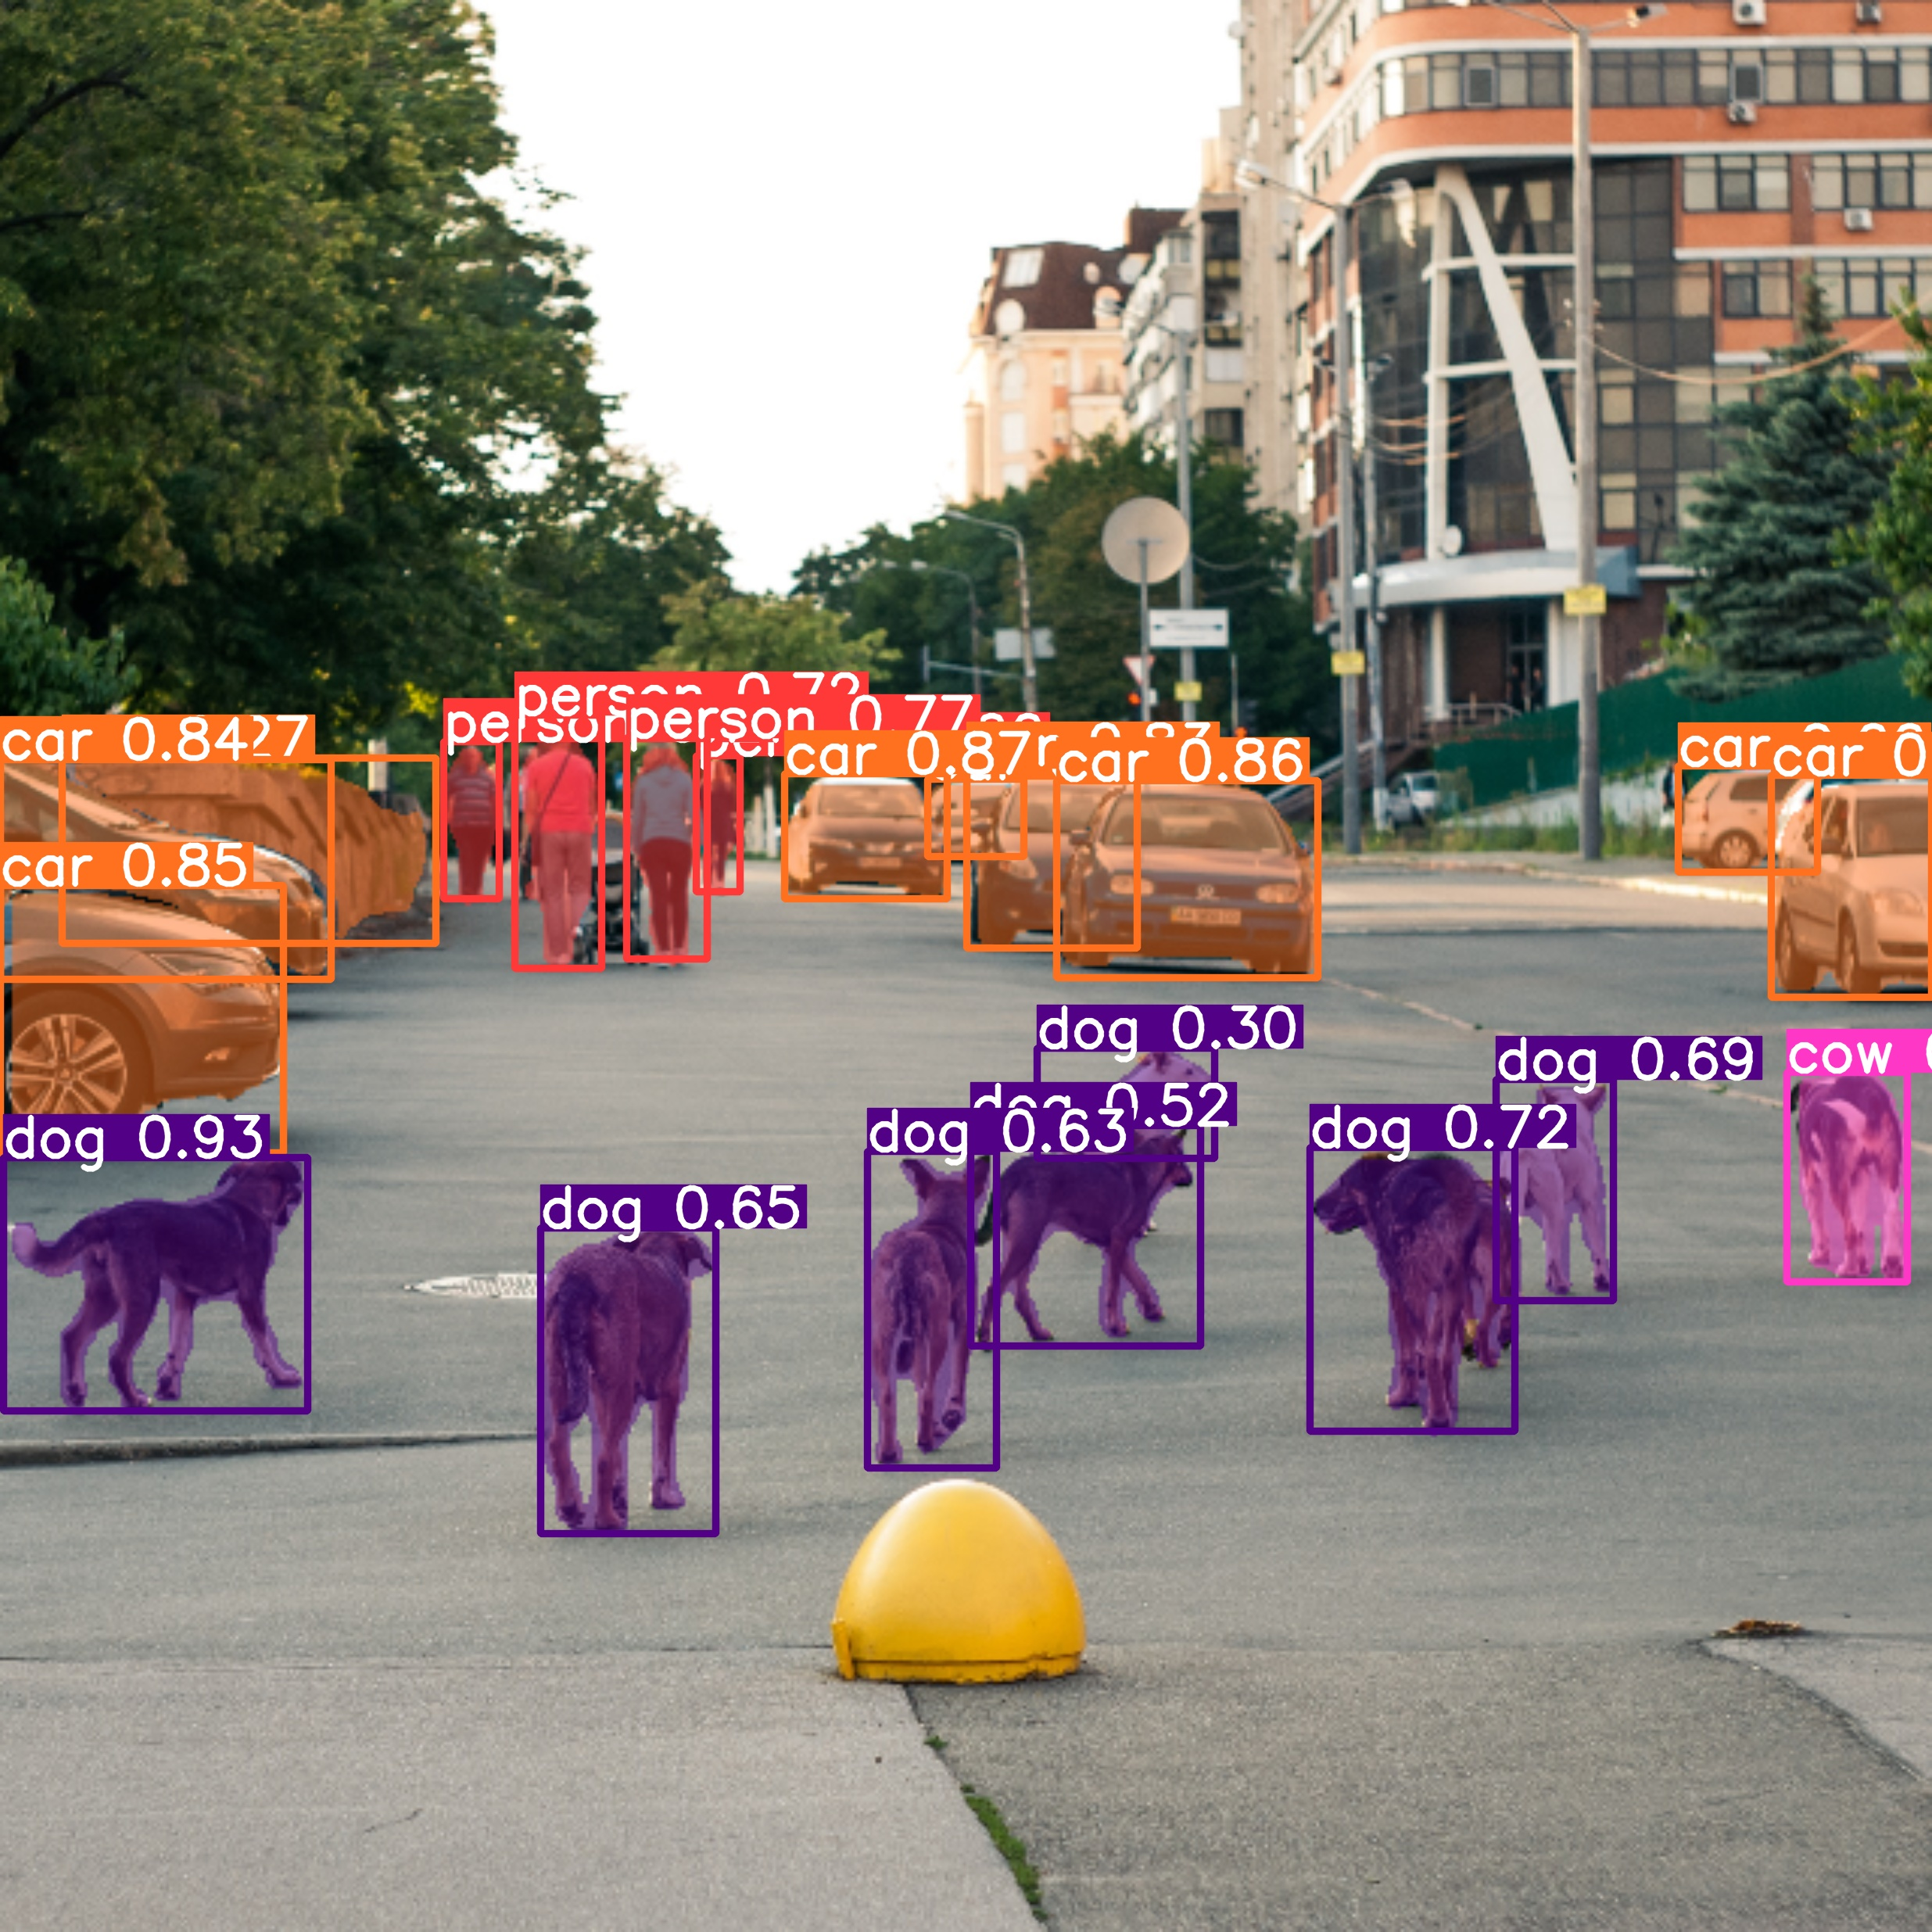

In [21]:
imgshow('/content/YOLOv8/runs/segment/predict/dogs_n_cars (1).jpg', width = 600)

In [22]:
!yolo task=segment mode=predict conf=0.25 source="/content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4" save=True

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients

video 1/1 (1/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 10 persons, 127.3ms
video 1/1 (2/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 11 persons, 7.8ms
video 1/1 (3/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 10 persons, 8.4ms
video 1/1 (4/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 9 persons, 7.8ms
video 1/1 (5/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 11 persons, 7.8ms
video 1/1 (6/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 9 persons, 7.8ms
video 1/1 (7/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 9 persons, 7.8ms
video 1/1 (8/272) /content/drive/MyDrive/Colab Notebooks/datasets/test_vid2.mp4: 448x640 8

#Train of Custom Dataset

In [23]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=0dd2078ad745122e96c9f1e73439c7cdd1daa72306910f2d00290074cb498d41
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

In [24]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API-KEY")
project = rf.workspace("iman-langaran-jr95m").project("football-players-test")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.164, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to football-players-test-1 in yolov8:: 100%|██████████| 2254/2254 [00:01<00:00, 1216.60it/s]


In [28]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/YOLOv8/football-players-test-1/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/YOLOv8/football-players-test-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [29]:
!yolo task=detect mode=val model=/content/YOLOv8/runs/detect/train4/weights/best.pt data=/content/YOLOv8/football-players-test-1/data.yaml

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients
val: Scanning /content/YOLOv8/football-players-test-1/valid/labels.cache... 38 images, 0 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:05<00:00,  1.90s/it]
                   all         38        905      0.872      0.758      0.814      0.528
                  ball         38         35      0.776      0.314      0.414      0.137
            goalkeeper         38         27      0.891      0.913      0.965      0.682
                player         38        754      0.938      0.955      0.984      0.722
               referee         38         89      0.883      0.851      0.892      0.569
Speed: 3.1ms preprocess, 42.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val


In [30]:
!yolo task=detect mode=predict model=/content/YOLOv8/runs/detect/train4/weights/best.pt conf=0.25 source=/content/YOLOv8/football-players-test-1/test/images


Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients

image 1/13 /content/YOLOv8/football-players-test-1/test/images/40cd38_7_6_png_jpg.rf.9129dde254799da65e541a086ec172a0.jpg: 640x640 20 players, 1 referee, 16.3ms
image 2/13 /content/YOLOv8/football-players-test-1/test/images/42ba34_1_5_png_jpg.rf.ea43cf6328fe247d6bf3eea9eb017e20.jpg: 640x640 1 goalkeeper, 22 players, 2 referees, 16.3ms
image 3/13 /content/YOLOv8/football-players-test-1/test/images/42ba34_5_5_png_jpg.rf.32f50bdba8b25b80136e71eb8fbf979c.jpg: 640x640 1 goalkeeper, 19 players, 16.3ms
image 4/13 /content/YOLOv8/football-players-test-1/test/images/4b770a_1_4_png_jpg.rf.757f2beb3c7bb42278cf406cab581187.jpg: 640x640 1 goalkeeper, 18 players, 4 referees, 16.3ms
image 5/13 /content/YOLOv8/football-players-test-1/test/images/4b770a_3_6_png_jpg.rf.44d988c1a189e0ac62760f19d29b2deb.jpg: 640x640 1 goalkeeper, 21 players, 1 referee